# **Naive Bayes Classifier**

## **Importing the libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## **Importing the dataset**

In [2]:
data = pd.read_csv('preprocessed_data.csv', index_col=0)

## **Splitting the dataset into Training set and Test set**

In [3]:
X = data.iloc[:,:-1]
y = data['result']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= .2, stratify=y)

## **Training the Naive Bayes classification model on the Training set**

In [5]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB(var_smoothing=1e-09)
classifier.fit(X_train, y_train)

GaussianNB()

## Predicting a new result

In [6]:
y_pred = classifier.predict(X_test)

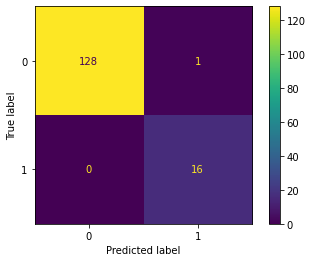

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(classifier, X_test, y_test)

# **Classification Metrics**

In [8]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [9]:
# Classification Accuracy on the Test Set
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy: {0:0.4f}'.format(classification_accuracy))

Classification accuracy: 0.9931


In [10]:
# Classification Error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error: {0:0.4f}'.format(classification_error))

Classification error: 0.0069


In [11]:
# Precision Score
precision = TP / float(TP + FP)
print('Precision: {0:0.4f}'.format(precision))

Precision: 0.9412


In [12]:
# Recall or Sensitivity
recall = TP / float(TP + FN)
print('Recall or Sensitivity: {0:0.4f}'.format(recall))

Recall or Sensitivity: 1.0000


In [13]:
# F1 Score
f1 = 2 * (precision * recall) / (precision + recall)
print('F1 score: {0:0.4f}'.format(f1))

F1 score: 0.9697


# Classification Report

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       129
           1       0.94      1.00      0.97        16

    accuracy                           0.99       145
   macro avg       0.97      1.00      0.98       145
weighted avg       0.99      0.99      0.99       145



## **ROC & AUC**

### **Prediction probabilities** 

In [15]:
r_probs = [0 for _ in range(len(y_test))]
nb_probs = classifier.predict_proba(X_test)

Probabilities for the positive outcome is kept.

In [16]:
nb_probs = nb_probs[:, 1]

In [17]:
# ROC Curve and AUC
from sklearn.metrics import roc_curve, roc_auc_score

### **Calculate AUC**
**ROC** is the receiver operating characteristic - 
**AUC** is the area under the ROC curve

In [18]:
r_auc = roc_auc_score(y_test, r_probs)
nb_auc = roc_auc_score(y_test, nb_probs)

### **Print AUC scores**

In [19]:
print('Random (chance) Prediction: AUC = %.3f' % (r_auc))
print('SVM: AUC = %.3f' % (nb_auc))

Random (chance) Prediction: AUC = 0.500
SVM: AUC = 0.996


### **Calculate ROC curve**

In [20]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)

## **Plot the ROC curve**

In [21]:
import matplotlib.pyplot as plt

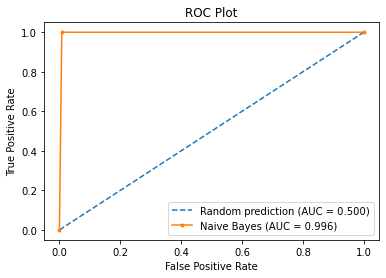

In [22]:

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUC = %0.3f)' % r_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUC = %0.3f)' % nb_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

# Hyperparameters' Tuning

In [23]:
from sklearn.model_selection import GridSearchCV
parameters = {'var_smoothing':[1e-09, 1e-15, 1e-20, 1e-30, 1e-4]}
result = GridSearchCV(classifier, parameters, refit=True, cv=None, verbose=10)
result.fit(data, data.result)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5; 1/5] START var_smoothing=1e-09.........................................
[CV 1/5; 1/5] END ..........var_smoothing=1e-09;, score=0.959 total time=   0.0s
[CV 2/5; 1/5] START var_smoothing=1e-09.........................................
[CV 2/5; 1/5] END ..........var_smoothing=1e-09;, score=0.869 total time=   0.0s
[CV 3/5; 1/5] START var_smoothing=1e-09.........................................
[CV 3/5; 1/5] END ..........var_smoothing=1e-09;, score=0.255 total time=   0.0s
[CV 4/5; 1/5] START var_smoothing=1e-09.........................................
[CV 4/5; 1/5] END ..........var_smoothing=1e-09;, score=0.779 total time=   0.0s
[CV 5/5; 1/5] START var_smoothing=1e-09.........................................
[CV 5/5; 1/5] END ..........var_smoothing=1e-09;, score=1.000 total time=   0.0s
[CV 1/5; 2/5] START var_smoothing=1e-15.........................................
[CV 1/5; 2/5] END ..........var_smoothing=1e-15;,